In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_400','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,261
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,248
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,9
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,100
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,284
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,284
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,331
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,348


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(40850, 473)

In [18]:
X_test.shape

(13617, 473)

In [19]:
X_train

array([[0.93560606, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.92424242, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98484848, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98863636, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91287879, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.9469697 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',random_state=0)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                7584      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=5000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/5000
40850/40850 [==============================] - 1s 26us/sample - loss: 101854602.3622 - val_loss: 101820870.8109
Epoch 2/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 99395623.0408 - val_loss: 95702182.0812
Epoch 3/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 85873278.5077 - val_loss: 72938093.6018
Epoch 4/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 54006996.8956 - val_loss: 35295233.4726
Epoch 5/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 23819276.9388 - val_loss: 17415684.9500
Epoch 6/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 16017390.8988 - val_loss: 15527958.3139
Epoch 7/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 14836723.2249 - val_loss: 14605186.2806
Epoch 8/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 1396

40850/40850 [==============================] - 1s 12us/sample - loss: 5560946.6148 - val_loss: 5716985.2492
Epoch 68/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5557244.3612 - val_loss: 5716936.4682
Epoch 69/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5557966.9949 - val_loss: 5711513.1048
Epoch 70/5000
40850/40850 [==============================] - ETA: 0s - loss: 5566977.102 - 0s 12us/sample - loss: 5556137.4390 - val_loss: 5708530.1635
Epoch 71/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5555963.9261 - val_loss: 5707056.6062
Epoch 72/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5552983.3979 - val_loss: 5704148.2115
Epoch 73/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5552742.7438 - val_loss: 5703647.8599
Epoch 74/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5552739.8838 - val_loss: 5700724.0377
Epoch 75

Epoch 134/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5503195.4454 - val_loss: 5646198.0994
Epoch 135/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5501694.1824 - val_loss: 5644721.0673
Epoch 136/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5500984.5898 - val_loss: 5644011.7826
Epoch 137/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5499947.3973 - val_loss: 5643475.1242
Epoch 138/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5498830.8735 - val_loss: 5641083.8867
Epoch 139/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5498553.4487 - val_loss: 5639974.6672
Epoch 140/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5495702.3796 - val_loss: 5638742.6906
Epoch 141/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5495304.5476 - val_loss: 5645792.9012
Epoch 142/5000
4

40850/40850 [==============================] - 0s 11us/sample - loss: 5396010.3982 - val_loss: 5555571.6953
Epoch 201/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5395270.7090 - val_loss: 5559170.7035
Epoch 202/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5395096.3552 - val_loss: 5552102.1346
Epoch 203/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5392349.0589 - val_loss: 5555030.4424
Epoch 204/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5391504.2713 - val_loss: 5550494.6805
Epoch 205/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5389968.4459 - val_loss: 5548417.5567
Epoch 206/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5388596.9271 - val_loss: 5549940.9535
Epoch 207/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5388851.6276 - val_loss: 5546617.9217
Epoch 208/5000
40850/40850 [===

40850/40850 [==============================] - 0s 10us/sample - loss: 5326435.0809 - val_loss: 5513973.6471
Epoch 267/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5323363.9966 - val_loss: 5511672.3005
Epoch 268/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5322671.0729 - val_loss: 5513110.5732
Epoch 269/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5321994.4174 - val_loss: 5512935.3518
Epoch 270/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5319682.1273 - val_loss: 5509427.9805
Epoch 271/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5318208.2249 - val_loss: 5514917.8325
Epoch 272/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5316929.5113 - val_loss: 5510783.9949
Epoch 273/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5315812.6570 - val_loss: 5514820.8150
Epoch 274/5000
40850/40850 [===

40850/40850 [==============================] - 0s 10us/sample - loss: 5266812.3081 - val_loss: 5472891.3409
Epoch 333/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5265935.8699 - val_loss: 5466206.6312
Epoch 334/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5265173.7381 - val_loss: 5468516.7282
Epoch 335/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5266824.4365 - val_loss: 5465707.3662
Epoch 336/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5262148.7973 - val_loss: 5470535.7475
Epoch 337/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5261970.5552 - val_loss: 5467092.1771
Epoch 338/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5262463.1191 - val_loss: 5464763.5134
Epoch 339/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5262156.3832 - val_loss: 5462374.6631
Epoch 340/5000
40850/40850 [===

40850/40850 [==============================] - 0s 10us/sample - loss: 5210258.8757 - val_loss: 5416374.3004
Epoch 399/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5209768.9670 - val_loss: 5423703.3211
Epoch 400/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5209884.3503 - val_loss: 5416566.9533
Epoch 401/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5208374.2348 - val_loss: 5414874.0173
Epoch 402/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5206373.0052 - val_loss: 5415181.8029
Epoch 403/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5204672.3792 - val_loss: 5412648.4294
Epoch 404/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5205829.0353 - val_loss: 5412335.3760
Epoch 405/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5202988.2980 - val_loss: 5411104.0597
Epoch 406/5000
40850/40850 [===

Epoch 465/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5151144.4409 - val_loss: 5380373.9456
Epoch 466/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5149308.6733 - val_loss: 5375189.1657
Epoch 467/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5149459.2670 - val_loss: 5370161.2868
Epoch 468/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5149033.2192 - val_loss: 5371751.2149
Epoch 469/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5149074.6563 - val_loss: 5372328.5055
Epoch 470/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5148388.7672 - val_loss: 5371678.2078
Epoch 471/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5149656.6821 - val_loss: 5369236.6025
Epoch 472/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5149327.7599 - val_loss: 5372123.3544
Epoch 473/5000
4

40850/40850 [==============================] - 0s 10us/sample - loss: 5113120.4358 - val_loss: 5348690.7627
Epoch 532/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5111576.0247 - val_loss: 5351417.7121
Epoch 533/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5111689.9164 - val_loss: 5349828.2375
Epoch 534/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5113129.8353 - val_loss: 5351214.5890
Epoch 535/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5111763.0886 - val_loss: 5345595.2000
Epoch 536/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5110455.3899 - val_loss: 5346645.1221
Epoch 537/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5108231.3475 - val_loss: 5345442.5811
Epoch 538/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5107329.7741 - val_loss: 5352843.5785
Epoch 539/5000
40850/40850 [===

Epoch 598/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5067445.4367 - val_loss: 5327697.0950
Epoch 599/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5066263.4537 - val_loss: 5328268.3376
Epoch 600/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5065295.6061 - val_loss: 5328649.9933
Epoch 601/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5062697.1523 - val_loss: 5327642.3023
Epoch 602/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5064070.9996 - val_loss: 5325779.1135
Epoch 603/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5063517.4494 - val_loss: 5324573.5947
Epoch 604/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5060707.5524 - val_loss: 5332609.6836
Epoch 605/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5061908.8016 - val_loss: 5327859.9184
Epoch 606/5000
4

40850/40850 [==============================] - 1s 13us/sample - loss: 5012897.9844 - val_loss: 5301455.8193
Epoch 665/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5012694.0100 - val_loss: 5304588.6090
Epoch 666/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5011538.3745 - val_loss: 5299529.6467
Epoch 667/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5012249.0023 - val_loss: 5298508.7591
Epoch 668/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5008968.3027 - val_loss: 5298095.2331
Epoch 669/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5007464.2254 - val_loss: 5301601.8763
Epoch 670/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5008636.4877 - val_loss: 5295876.5485
Epoch 671/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5008862.2451 - val_loss: 5297202.4700
Epoch 672/5000
40850/40850 [===

40850/40850 [==============================] - 0s 12us/sample - loss: 4962285.5949 - val_loss: 5277751.5239
Epoch 731/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4962218.0710 - val_loss: 5281753.7647
Epoch 732/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4961571.8530 - val_loss: 5291174.1022
Epoch 733/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4960557.2880 - val_loss: 5280712.5302
Epoch 734/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4958374.9529 - val_loss: 5275244.8983
Epoch 735/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4959835.8498 - val_loss: 5277319.1759
Epoch 736/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4956547.5212 - val_loss: 5276831.2588
Epoch 737/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4958380.9548 - val_loss: 5281548.4760
Epoch 738/5000
40850/40850 [===

Epoch 797/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4922734.8722 - val_loss: 5270059.0696
Epoch 798/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4920147.3098 - val_loss: 5268561.9643
Epoch 799/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4920932.0959 - val_loss: 5267561.6458
Epoch 800/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4919535.3646 - val_loss: 5266777.6469
Epoch 801/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4920043.6921 - val_loss: 5280181.7269
Epoch 802/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4918782.4277 - val_loss: 5272158.6762
Epoch 803/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4918582.1218 - val_loss: 5272027.8814
Epoch 804/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4919244.2952 - val_loss: 5284686.2186
Epoch 805/5000
4

40850/40850 [==============================] - 0s 10us/sample - loss: 4891215.6595 - val_loss: 5273027.5172
Epoch 864/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4890505.5034 - val_loss: 5268052.4357
Epoch 865/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4888500.4509 - val_loss: 5267055.0226
Epoch 866/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4887025.2992 - val_loss: 5267017.9677
Epoch 867/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4890984.0579 - val_loss: 5270358.1993
Epoch 868/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4888527.8223 - val_loss: 5269730.4401
Epoch 869/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4889833.8780 - val_loss: 5269365.0588
Epoch 870/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4889445.8901 - val_loss: 5267964.3964
Epoch 871/5000
40850/40850 [===

40850/40850 [==============================] - 0s 11us/sample - loss: 4864841.6948 - val_loss: 5266862.6160
Epoch 930/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4864376.0718 - val_loss: 5257861.6690
Epoch 931/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4862761.0920 - val_loss: 5259455.5021
Epoch 932/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4861827.1795 - val_loss: 5262020.9639
Epoch 933/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4864229.7545 - val_loss: 5262205.2107
Epoch 934/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4863040.7879 - val_loss: 5275292.5845
Epoch 935/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4862320.0388 - val_loss: 5257507.2324
Epoch 936/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4861049.6540 - val_loss: 5258705.3206
Epoch 937/5000
40850/40850 [===

Epoch 995/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4846180.3355 - val_loss: 5268519.2446
Epoch 996/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4842707.7065 - val_loss: 5264441.6934
Epoch 997/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4843771.7834 - val_loss: 5262252.4547
Epoch 998/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4842250.1536 - val_loss: 5260758.7058
Epoch 999/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4843042.6444 - val_loss: 5258874.4355
Epoch 1000/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4838952.5513 - val_loss: 5266734.4809
Epoch 1001/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4838966.8059 - val_loss: 5256178.0725
Epoch 1002/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4840242.0523 - val_loss: 5262265.6174
Epoch 1003/50

40850/40850 [==============================] - 0s 10us/sample - loss: 4825368.5611 - val_loss: 5263872.7516
Epoch 1062/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4825396.8367 - val_loss: 5264295.0998
Epoch 1063/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4825065.5821 - val_loss: 5265689.8843
Epoch 1064/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4825615.9629 - val_loss: 5262985.1029
Epoch 1065/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4825083.7970 - val_loss: 5262253.1343
Epoch 1066/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4826325.0505 - val_loss: 5259850.8380
Epoch 1067/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4824235.3706 - val_loss: 5268215.6043
Epoch 1068/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4825787.0188 - val_loss: 5261081.5359
Epoch 1069/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4812547.2504 - val_loss: 5264246.4844
Epoch 1128/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4812766.2647 - val_loss: 5262642.3583
Epoch 1129/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4812295.4728 - val_loss: 5270909.8428
Epoch 1130/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4811954.5980 - val_loss: 5265183.7124
Epoch 1131/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4811745.8915 - val_loss: 5264732.8277
Epoch 1132/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4814753.9699 - val_loss: 5261420.3880
Epoch 1133/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4812205.8115 - val_loss: 5267108.2546
Epoch 1134/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4810285.0726 - val_loss: 5273491.0999
Epoch 1135/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4801548.5555 - val_loss: 5261106.6062
Epoch 1194/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4800595.3635 - val_loss: 5264080.8962
Epoch 1195/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4800245.8054 - val_loss: 5275781.4425
Epoch 1196/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4798291.8401 - val_loss: 5261098.7890
Epoch 1197/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4799974.0640 - val_loss: 5261285.3066
Epoch 1198/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4798116.8046 - val_loss: 5272226.5532
Epoch 1199/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4797283.3977 - val_loss: 5259166.7096
Epoch 1200/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4796670.0969 - val_loss: 5274225.3198
Epoch 1201/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4789655.0377 - val_loss: 5264503.2103
Epoch 1260/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4787591.8752 - val_loss: 5264091.5043
Epoch 1261/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4788999.6994 - val_loss: 5267493.6245
Epoch 1262/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4785850.9578 - val_loss: 5259252.5805
Epoch 1263/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4787971.5279 - val_loss: 5267838.8470
Epoch 1264/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4788584.4734 - val_loss: 5260847.1844
Epoch 1265/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4786796.9108 - val_loss: 5261489.9157
Epoch 1266/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4787142.6256 - val_loss: 5260308.4957
Epoch 1267/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4778644.2863 - val_loss: 5256477.6243
Epoch 1326/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4776133.9834 - val_loss: 5256122.0509
Epoch 1327/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4776607.9344 - val_loss: 5265014.7102
Epoch 1328/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4777686.5396 - val_loss: 5259782.0652
Epoch 1329/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4776255.8159 - val_loss: 5259297.6458
Epoch 1330/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4777500.5248 - val_loss: 5254352.9774
Epoch 1331/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4779241.3936 - val_loss: 5258704.6322
Epoch 1332/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4773895.0263 - val_loss: 5266936.4915
Epoch 1333/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4766729.1716 - val_loss: 5256376.6362
Epoch 1392/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4763947.7474 - val_loss: 5259332.9647
Epoch 1393/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4765733.2319 - val_loss: 5261131.7135
Epoch 1394/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4765988.1271 - val_loss: 5259746.7497
Epoch 1395/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4765545.4029 - val_loss: 5258957.3660
Epoch 1396/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4764547.4363 - val_loss: 5256484.2103
Epoch 1397/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4764494.2591 - val_loss: 5258308.5868
Epoch 1398/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4764187.0531 - val_loss: 5259176.8481
Epoch 1399/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4753071.2632 - val_loss: 5257674.6804
Epoch 1458/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4757636.9712 - val_loss: 5261458.7956
Epoch 1459/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4753230.2507 - val_loss: 5256691.0408
Epoch 1460/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4753113.5537 - val_loss: 5251217.6895
Epoch 1461/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4756052.5564 - val_loss: 5258461.9309
Epoch 1462/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4755633.0117 - val_loss: 5255507.2885
Epoch 1463/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4754498.4486 - val_loss: 5253974.4433
Epoch 1464/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4753985.8344 - val_loss: 5252807.3119
Epoch 1465/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4741458.2869 - val_loss: 5265881.8175
Epoch 1524/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4742807.1218 - val_loss: 5256267.4516
Epoch 1525/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4743982.0552 - val_loss: 5254802.4919
Epoch 1526/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4742485.6199 - val_loss: 5252455.5964
Epoch 1527/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4741986.3459 - val_loss: 5260479.6627
Epoch 1528/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4743821.1518 - val_loss: 5253234.7520
Epoch 1529/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4742855.2874 - val_loss: 5253133.2666
Epoch 1530/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4743355.7006 - val_loss: 5254232.1592
Epoch 1531/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4734594.4431 - val_loss: 5250826.0370
Epoch 1590/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4733795.1236 - val_loss: 5249250.3891
Epoch 1591/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4733627.2618 - val_loss: 5249719.3935
Epoch 1592/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4734198.7346 - val_loss: 5249978.7309
Epoch 1593/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4735365.4310 - val_loss: 5245835.9285
Epoch 1594/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4734058.3875 - val_loss: 5254562.9895
Epoch 1595/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4733927.8850 - val_loss: 5255543.4200
Epoch 1596/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4735056.6888 - val_loss: 5252649.0525
Epoch 1597/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4724407.1424 - val_loss: 5250015.5702
Epoch 1656/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4721773.2258 - val_loss: 5245112.5790
Epoch 1657/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4724758.7055 - val_loss: 5247675.5573
Epoch 1658/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4722228.1022 - val_loss: 5248462.3354
Epoch 1659/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4722825.6856 - val_loss: 5262714.8861
Epoch 1660/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4723756.8241 - val_loss: 5249102.0310
Epoch 1661/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4720773.2788 - val_loss: 5257268.5743
Epoch 1662/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4719795.1482 - val_loss: 5249299.4138
Epoch 1663/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4713263.3884 - val_loss: 5247224.3437
Epoch 1722/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4713111.9538 - val_loss: 5253187.1181
Epoch 1723/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4713911.6370 - val_loss: 5251190.5954
Epoch 1724/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4712308.7858 - val_loss: 5249998.8728
Epoch 1725/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4713314.0910 - val_loss: 5251462.6403
Epoch 1726/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4714548.7572 - val_loss: 5258094.3342
Epoch 1727/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4713179.0116 - val_loss: 5254157.9623
Epoch 1728/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4712273.8918 - val_loss: 5247533.3436
Epoch 1729/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4703766.8627 - val_loss: 5247897.2622
Epoch 1788/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4704425.0213 - val_loss: 5258061.8475
Epoch 1789/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4703758.2245 - val_loss: 5256649.0573
Epoch 1790/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4706165.9288 - val_loss: 5248990.4493
Epoch 1791/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4705242.8087 - val_loss: 5250156.5114
Epoch 1792/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4705118.6713 - val_loss: 5247320.6859
Epoch 1793/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4704697.6803 - val_loss: 5249956.8548
Epoch 1794/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4704236.7106 - val_loss: 5260007.8784
Epoch 1795/5000
40850/40

Epoch 1853/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4703008.6391 - val_loss: 5262014.6714
Epoch 1854/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4698423.3466 - val_loss: 5249804.0026
Epoch 1855/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4698460.6264 - val_loss: 5257844.7078
Epoch 1856/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4698722.2248 - val_loss: 5255053.8475
Epoch 1857/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4699207.6363 - val_loss: 5268817.9379
Epoch 1858/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4699584.7064 - val_loss: 5261696.5743
Epoch 1859/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4699820.7595 - val_loss: 5251075.6339
Epoch 1860/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4700130.1329 - val_loss: 5254816.8427
Epoch 18

40850/40850 [==============================] - 1s 12us/sample - loss: 4691033.6432 - val_loss: 5253232.8694
Epoch 1920/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4691965.3515 - val_loss: 5256727.4755
Epoch 1921/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4692468.8961 - val_loss: 5250088.1220
Epoch 1922/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4691673.7858 - val_loss: 5253894.4929
Epoch 1923/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4690086.5836 - val_loss: 5249755.2727
Epoch 1924/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4691485.7568 - val_loss: 5254118.3683
Epoch 1925/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4692321.4372 - val_loss: 5252048.5062
Epoch 1926/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4691190.6982 - val_loss: 5253400.5752
Epoch 1927/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4684524.9277 - val_loss: 5257838.4169
Epoch 1986/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4683970.7000 - val_loss: 5249736.9763
Epoch 1987/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4683752.5929 - val_loss: 5255513.0131
Epoch 1988/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4684661.4824 - val_loss: 5254259.6734
Epoch 1989/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4685305.4687 - val_loss: 5248651.3314
Epoch 1990/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4686172.4800 - val_loss: 5254706.3590
Epoch 1991/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4686290.4314 - val_loss: 5248308.6544
Epoch 1992/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4683041.5294 - val_loss: 5247163.4055
Epoch 1993/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4677080.9986 - val_loss: 5255457.7121
Epoch 2052/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4677567.4559 - val_loss: 5254833.0587
Epoch 2053/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4677080.6524 - val_loss: 5261039.6284
Epoch 2054/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4677937.3920 - val_loss: 5262269.0105
Epoch 2055/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4675553.6420 - val_loss: 5268582.6199
Epoch 2056/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4677311.5880 - val_loss: 5266036.4462
Epoch 2057/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4675741.8595 - val_loss: 5257411.1982
Epoch 2058/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4677371.5927 - val_loss: 5253888.5813
Epoch 2059/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4670641.0332 - val_loss: 5261517.8834
Epoch 2118/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4669294.6404 - val_loss: 5256980.2450
Epoch 2119/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4670138.1346 - val_loss: 5259316.3554
Epoch 2120/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4667601.0143 - val_loss: 5262115.3585
Epoch 2121/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4671185.0622 - val_loss: 5271840.0554
Epoch 2122/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4670664.2167 - val_loss: 5259840.9410
Epoch 2123/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4670487.5352 - val_loss: 5253206.6103
Epoch 2124/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4672425.0992 - val_loss: 5255552.1049
Epoch 2125/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4664054.9848 - val_loss: 5258703.9188
Epoch 2184/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4664013.3699 - val_loss: 5272352.1324
Epoch 2185/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4662831.5756 - val_loss: 5259592.6879
Epoch 2186/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4664331.0616 - val_loss: 5257670.6955
Epoch 2187/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4662418.5730 - val_loss: 5265284.5594
Epoch 2188/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4661445.3555 - val_loss: 5260558.8134
Epoch 2189/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4659892.9874 - val_loss: 5253157.1815
Epoch 2190/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4660817.5130 - val_loss: 5264686.3505
Epoch 2191/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4656422.3497 - val_loss: 5253563.5917
Epoch 2250/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4655176.5287 - val_loss: 5259201.6270
Epoch 2251/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4657451.4381 - val_loss: 5256510.8182
Epoch 2252/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4655452.6940 - val_loss: 5257467.2318
Epoch 2253/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4659342.4656 - val_loss: 5258678.3358
Epoch 2254/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4654880.2658 - val_loss: 5259092.0295
Epoch 2255/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4655365.5882 - val_loss: 5258797.5901
Epoch 2256/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4654661.4306 - val_loss: 5256832.3603
Epoch 2257/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4653119.4656 - val_loss: 5263299.4588
Epoch 2316/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4649302.2653 - val_loss: 5255969.8777
Epoch 2317/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4648636.2869 - val_loss: 5260928.5473
Epoch 2318/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4649453.1896 - val_loss: 5259943.0285
Epoch 2319/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4650556.8891 - val_loss: 5267923.5565
Epoch 2320/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4648779.2494 - val_loss: 5265341.2396
Epoch 2321/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4650553.9448 - val_loss: 5263229.5487
Epoch 2322/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4650460.8176 - val_loss: 5262029.4980
Epoch 2323/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4648152.9186 - val_loss: 5258171.6713
Epoch 2382/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4643849.5325 - val_loss: 5255052.4265
Epoch 2383/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4643757.6284 - val_loss: 5266757.2625
Epoch 2384/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4645743.6945 - val_loss: 5260243.6613
Epoch 2385/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4643150.1718 - val_loss: 5249696.1124
Epoch 2386/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4644763.3738 - val_loss: 5258527.6707
Epoch 2387/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4644668.0304 - val_loss: 5263568.9046
Epoch 2388/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4643511.0393 - val_loss: 5265844.4612
Epoch 2389/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4639236.4797 - val_loss: 5256306.6202
Epoch 2448/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4635807.6270 - val_loss: 5263957.0898
Epoch 2449/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4637929.4959 - val_loss: 5281613.7875
Epoch 2450/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4638383.9814 - val_loss: 5259204.1371
Epoch 2451/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4637332.0769 - val_loss: 5253902.0744
Epoch 2452/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4640544.0759 - val_loss: 5256622.9957
Epoch 2453/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4636154.5201 - val_loss: 5256396.2929
Epoch 2454/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4636815.1705 - val_loss: 5257913.7733
Epoch 2455/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4631440.2115 - val_loss: 5265147.6583
Epoch 2514/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4634380.4899 - val_loss: 5258403.0823
Epoch 2515/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4631306.6927 - val_loss: 5252124.9553
Epoch 2516/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4631140.1597 - val_loss: 5256400.8986
Epoch 2517/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4632238.8176 - val_loss: 5254059.5264
Epoch 2518/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4632491.2695 - val_loss: 5253141.0572
Epoch 2519/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4630709.1396 - val_loss: 5253376.0632
Epoch 2520/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4629049.6570 - val_loss: 5252455.7265
Epoch 2521/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4624313.2300 - val_loss: 5251942.7583
Epoch 2580/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4626022.9386 - val_loss: 5261719.8828
Epoch 2581/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4625835.3802 - val_loss: 5251718.8339
Epoch 2582/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4624887.2841 - val_loss: 5267353.1147
Epoch 2583/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4627151.9706 - val_loss: 5256548.9112
Epoch 2584/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4625343.4408 - val_loss: 5256207.5889
Epoch 2585/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4625496.5114 - val_loss: 5251763.6370
Epoch 2586/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4626014.3510 - val_loss: 5256653.3167
Epoch 2587/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4619718.9073 - val_loss: 5249931.0507
Epoch 2646/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4618619.2623 - val_loss: 5256324.6729
Epoch 2647/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4620268.7773 - val_loss: 5260581.7262
Epoch 2648/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4619615.4028 - val_loss: 5254895.8812
Epoch 2649/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4619160.3444 - val_loss: 5251547.1094
Epoch 2650/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4620471.4536 - val_loss: 5251209.3565
Epoch 2651/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4618994.6947 - val_loss: 5267491.1422
Epoch 2652/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4617372.7516 - val_loss: 5255469.1283
Epoch 2653/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4616015.1478 - val_loss: 5269538.4169
Epoch 2712/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4612589.9142 - val_loss: 5251572.4460
Epoch 2713/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4613420.4519 - val_loss: 5246817.9612
Epoch 2714/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4610104.0093 - val_loss: 5254589.6673
Epoch 2715/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4611617.3128 - val_loss: 5251560.0848
Epoch 2716/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4610117.1090 - val_loss: 5249738.3008
Epoch 2717/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4612285.9785 - val_loss: 5251862.4212
Epoch 2718/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4614678.1765 - val_loss: 5254119.4422
Epoch 2719/5000
40850/40

Epoch 2777/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4601396.9856 - val_loss: 5251283.2033
Epoch 2778/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4600114.8311 - val_loss: 5250611.1644
Epoch 2779/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4603199.0453 - val_loss: 5250686.8732
Epoch 2780/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4601762.1676 - val_loss: 5251481.1183
Epoch 2781/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4601475.6528 - val_loss: 5253953.2929
Epoch 2782/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4604631.8085 - val_loss: 5253238.6986
Epoch 2783/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4605007.1593 - val_loss: 5249903.4535
Epoch 2784/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4603472.4064 - val_loss: 5254893.7515
Epoch 27

40850/40850 [==============================] - 1s 13us/sample - loss: 4593938.8781 - val_loss: 5254252.7091
Epoch 2844/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4592138.4146 - val_loss: 5246397.5591
Epoch 2845/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4594240.4676 - val_loss: 5249560.0886
Epoch 2846/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4594017.9356 - val_loss: 5248650.3114
Epoch 2847/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4591095.6820 - val_loss: 5245606.0702
Epoch 2848/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4594918.1850 - val_loss: 5251751.7652
Epoch 2849/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4590736.2687 - val_loss: 5241296.4267
Epoch 2850/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4592312.1086 - val_loss: 5241368.3899
Epoch 2851/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4585907.6710 - val_loss: 5243771.5874
Epoch 2910/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4584649.7141 - val_loss: 5243543.7105
Epoch 2911/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4586889.0370 - val_loss: 5239382.4817
Epoch 2912/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4586725.7464 - val_loss: 5251482.1745
Epoch 2913/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4584980.7568 - val_loss: 5248205.7483
Epoch 2914/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4586419.0591 - val_loss: 5245571.4365
Epoch 2915/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4589430.9316 - val_loss: 5254242.9195
Epoch 2916/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4586110.9500 - val_loss: 5243427.6804
Epoch 2917/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4578973.9603 - val_loss: 5247780.4040
Epoch 2976/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4579544.3753 - val_loss: 5243064.2534
Epoch 2977/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4580700.4981 - val_loss: 5244218.4339
Epoch 2978/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4578566.4857 - val_loss: 5240785.5075
Epoch 2979/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4579282.1209 - val_loss: 5247107.3551
Epoch 2980/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4579239.3213 - val_loss: 5249725.4374
Epoch 2981/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4580461.5002 - val_loss: 5243949.2162
Epoch 2982/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4579653.9557 - val_loss: 5244259.6214
Epoch 2983/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4575139.7023 - val_loss: 5246498.2617
Epoch 3042/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4574407.1760 - val_loss: 5246377.2211
Epoch 3043/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4574252.4634 - val_loss: 5241585.9450
Epoch 3044/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4572734.6233 - val_loss: 5244976.0079
Epoch 3045/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4574864.4940 - val_loss: 5245449.3909
Epoch 3046/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4576391.4058 - val_loss: 5249993.0760
Epoch 3047/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4576985.7569 - val_loss: 5245693.2015
Epoch 3048/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4571011.8173 - val_loss: 5244169.6375
Epoch 3049/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4568158.2542 - val_loss: 5249160.7928
Epoch 3108/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4568155.3955 - val_loss: 5248900.2253
Epoch 3109/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4568941.7035 - val_loss: 5267736.6926
Epoch 3110/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4566337.3070 - val_loss: 5269885.6030
Epoch 3111/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4568847.2905 - val_loss: 5259511.2401
Epoch 3112/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4569545.6389 - val_loss: 5244491.3246
Epoch 3113/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4566327.1806 - val_loss: 5253061.2383
Epoch 3114/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4564576.5135 - val_loss: 5251783.1953
Epoch 3115/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4560210.3896 - val_loss: 5247539.1850
Epoch 3174/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4560356.9285 - val_loss: 5252942.2245
Epoch 3175/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4561228.9688 - val_loss: 5244492.6310
Epoch 3176/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4559487.3051 - val_loss: 5241983.6236
Epoch 3177/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4560956.8811 - val_loss: 5244295.3283
Epoch 3178/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4561433.1241 - val_loss: 5252329.7259
Epoch 3179/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4559898.7353 - val_loss: 5254096.9181
Epoch 3180/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4563235.4409 - val_loss: 5257453.8916
Epoch 3181/5000
40850/40

Epoch 3239/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4555682.9750 - val_loss: 5242595.6077
Epoch 3240/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4554441.4107 - val_loss: 5247417.2010
Epoch 3241/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4555597.2600 - val_loss: 5255317.9076
Epoch 3242/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4555946.5095 - val_loss: 5251207.5273
Epoch 3243/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4551986.9761 - val_loss: 5273100.9672
Epoch 3244/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4556759.6349 - val_loss: 5242164.8285
Epoch 3245/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4554840.8847 - val_loss: 5240118.5780
Epoch 3246/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4555579.0987 - val_loss: 5254566.4580
Epoch 32

40850/40850 [==============================] - 0s 12us/sample - loss: 4550701.5963 - val_loss: 5253238.6009
Epoch 3306/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4553381.8971 - val_loss: 5246612.2685
Epoch 3307/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4552200.6254 - val_loss: 5253646.4164
Epoch 3308/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4551239.7587 - val_loss: 5242267.6251
Epoch 3309/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4549991.9808 - val_loss: 5239592.0015
Epoch 3310/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4548228.3246 - val_loss: 5240129.5474
Epoch 3311/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4549478.3505 - val_loss: 5249763.3182
Epoch 3312/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4548834.5395 - val_loss: 5249438.7394
Epoch 3313/5000
40850/40

Epoch 3371/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4544183.3067 - val_loss: 5255417.0888
Epoch 3372/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4547396.4882 - val_loss: 5241015.1065
Epoch 3373/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4544303.7623 - val_loss: 5241031.5526
Epoch 3374/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4545652.4594 - val_loss: 5239584.0693
Epoch 3375/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4542242.3059 - val_loss: 5249472.7447
Epoch 3376/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4543947.6858 - val_loss: 5238515.7541
Epoch 3377/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4547938.3518 - val_loss: 5254220.6122
Epoch 3378/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4543465.0535 - val_loss: 5237285.9175
Epoch 33

40850/40850 [==============================] - 0s 11us/sample - loss: 4541780.8536 - val_loss: 5235357.0708
Epoch 3438/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4542115.4795 - val_loss: 5242868.3554
Epoch 3439/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4542469.1475 - val_loss: 5245381.0113
Epoch 3440/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4542249.5868 - val_loss: 5266866.2318
Epoch 3441/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4539803.7032 - val_loss: 5243623.6241
Epoch 3442/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4539897.0138 - val_loss: 5241689.2178
Epoch 3443/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4538693.9072 - val_loss: 5256698.5880
Epoch 3444/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4540144.5340 - val_loss: 5248553.2633
Epoch 3445/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4534165.8634 - val_loss: 5240956.1909
Epoch 3504/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4540249.7353 - val_loss: 5234826.6342
Epoch 3505/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4535302.8382 - val_loss: 5232363.5188
Epoch 3506/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4536207.4849 - val_loss: 5231108.7258
Epoch 3507/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4536600.1831 - val_loss: 5242086.6808
Epoch 3508/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4539901.7062 - val_loss: 5239616.6911
Epoch 3509/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4542060.3795 - val_loss: 5250549.2101
Epoch 3510/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4535887.9639 - val_loss: 5251783.6380
Epoch 3511/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4532559.1396 - val_loss: 5252238.5158
Epoch 3570/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4534203.8121 - val_loss: 5232739.8726
Epoch 3571/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4534893.6261 - val_loss: 5239234.6528
Epoch 3572/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4531630.5447 - val_loss: 5245005.0406
Epoch 3573/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4530305.0244 - val_loss: 5241535.3865
Epoch 3574/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4529794.0041 - val_loss: 5238136.1961
Epoch 3575/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4534444.8202 - val_loss: 5236756.6015
Epoch 3576/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4532808.4830 - val_loss: 5228051.2501
Epoch 3577/5000
40850/40

Epoch 3635/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4525877.1720 - val_loss: 5234384.5538
Epoch 3636/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4524973.0697 - val_loss: 5227689.4502
Epoch 3637/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4525923.4287 - val_loss: 5226430.9942
Epoch 3638/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4532073.1307 - val_loss: 5246599.3088
Epoch 3639/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4526331.8719 - val_loss: 5240899.5895
Epoch 3640/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4527665.8691 - val_loss: 5235879.1217
Epoch 3641/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4527810.1750 - val_loss: 5231897.9114
Epoch 3642/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4525973.0468 - val_loss: 5229315.2058
Epoch 36

40850/40850 [==============================] - 0s 12us/sample - loss: 4523371.2544 - val_loss: 5225070.7289
Epoch 3702/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4526614.1581 - val_loss: 5224508.6680
Epoch 3703/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4524040.7379 - val_loss: 5234478.9881
Epoch 3704/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4524801.9338 - val_loss: 5224663.6059
Epoch 3705/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4524083.7515 - val_loss: 5229448.2928
Epoch 3706/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4521498.3210 - val_loss: 5229803.8649
Epoch 3707/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4523775.9630 - val_loss: 5246178.0549
Epoch 3708/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4524964.9685 - val_loss: 5229545.3578
Epoch 3709/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4517582.3224 - val_loss: 5215253.4530
Epoch 3768/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4524773.5808 - val_loss: 5225314.8436
Epoch 3769/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4518284.7553 - val_loss: 5215647.8976
Epoch 3770/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4517244.8997 - val_loss: 5233462.9904
Epoch 3771/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4518404.7757 - val_loss: 5222506.5024
Epoch 3772/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4519893.0385 - val_loss: 5222850.0304
Epoch 3773/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4518147.3073 - val_loss: 5235514.4108
Epoch 3774/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4518034.7471 - val_loss: 5225412.9750
Epoch 3775/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4516443.8996 - val_loss: 5226402.4324
Epoch 3834/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4514935.9949 - val_loss: 5222354.1475
Epoch 3835/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4515985.1348 - val_loss: 5220118.7755
Epoch 3836/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4516068.3191 - val_loss: 5217188.6135
Epoch 3837/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4512875.8319 - val_loss: 5217417.1427
Epoch 3838/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4517810.9489 - val_loss: 5217081.0252
Epoch 3839/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4512496.2834 - val_loss: 5220203.4688
Epoch 3840/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4512597.5189 - val_loss: 5218925.8628
Epoch 3841/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4516388.0644 - val_loss: 5273379.0559
Epoch 3900/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4516373.9706 - val_loss: 5217821.9485
Epoch 3901/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4510127.6991 - val_loss: 5233485.9230
Epoch 3902/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4509624.5454 - val_loss: 5213863.0885
Epoch 3903/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4509453.1437 - val_loss: 5212202.8301
Epoch 3904/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4508508.8568 - val_loss: 5222329.5150
Epoch 3905/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4512057.7484 - val_loss: 5208507.2967
Epoch 3906/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4509471.4575 - val_loss: 5210508.8191
Epoch 3907/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4505437.6625 - val_loss: 5213328.8911
Epoch 3966/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4506381.7511 - val_loss: 5210968.7253
Epoch 3967/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4505784.0695 - val_loss: 5214262.3757
Epoch 3968/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4505745.0315 - val_loss: 5215940.7150
Epoch 3969/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4505222.7497 - val_loss: 5210753.7221
Epoch 3970/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4504614.8222 - val_loss: 5220242.2474
Epoch 3971/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4505149.4314 - val_loss: 5226113.9115
Epoch 3972/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4507009.3160 - val_loss: 5209304.4813
Epoch 3973/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4504290.8777 - val_loss: 5212485.8208
Epoch 4032/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4504692.2111 - val_loss: 5206468.7618
Epoch 4033/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4498601.9530 - val_loss: 5205622.7406
Epoch 4034/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4502961.4748 - val_loss: 5206960.8330
Epoch 4035/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4500775.4592 - val_loss: 5203056.2494
Epoch 4036/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4502055.6965 - val_loss: 5218028.0452
Epoch 4037/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4500978.1612 - val_loss: 5207436.9977
Epoch 4038/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4502266.7263 - val_loss: 5203652.3158
Epoch 4039/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4494436.6089 - val_loss: 5207096.4385
Epoch 4098/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4497047.5672 - val_loss: 5210954.0572
Epoch 4099/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4498404.5086 - val_loss: 5198316.2045
Epoch 4100/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4497089.0430 - val_loss: 5226248.7206
Epoch 4101/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4498191.6062 - val_loss: 5207372.7861
Epoch 4102/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4497793.1242 - val_loss: 5202031.7469
Epoch 4103/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4495083.7672 - val_loss: 5204012.1660
Epoch 4104/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4495905.1211 - val_loss: 5202460.7807
Epoch 4105/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4492715.4384 - val_loss: 5203856.0142
Epoch 4164/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4492492.4632 - val_loss: 5204126.0399
Epoch 4165/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4491502.2586 - val_loss: 5196066.7825
Epoch 4166/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4490485.6946 - val_loss: 5209894.9939
Epoch 4167/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4491005.5653 - val_loss: 5202658.2528
Epoch 4168/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4489483.9473 - val_loss: 5198723.4276
Epoch 4169/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4489583.8282 - val_loss: 5195933.5806
Epoch 4170/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4493434.9621 - val_loss: 5225248.6278
Epoch 4171/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4486551.0125 - val_loss: 5212793.7513
Epoch 4230/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4486119.4082 - val_loss: 5206321.7671
Epoch 4231/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4484949.0939 - val_loss: 5206953.7605
Epoch 4232/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4486508.2756 - val_loss: 5223288.1542
Epoch 4233/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4487821.8280 - val_loss: 5199946.4208
Epoch 4234/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4486171.5909 - val_loss: 5204034.6766
Epoch 4235/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4485873.8671 - val_loss: 5231885.2520
Epoch 4236/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4485129.7918 - val_loss: 5206859.0218
Epoch 4237/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4476172.9251 - val_loss: 5214109.5322
Epoch 4296/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4478482.4190 - val_loss: 5205425.1230
Epoch 4297/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4477905.7521 - val_loss: 5199901.9653
Epoch 4298/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4479474.0009 - val_loss: 5212130.8355
Epoch 4299/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4482037.2851 - val_loss: 5201407.1761
Epoch 4300/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4477838.0502 - val_loss: 5206504.7200
Epoch 4301/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4480097.1023 - val_loss: 5202528.6712
Epoch 4302/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4478284.5790 - val_loss: 5203933.9624
Epoch 4303/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4476961.0628 - val_loss: 5208212.1829
Epoch 4362/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4477698.6016 - val_loss: 5205779.3405
Epoch 4363/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4474456.0544 - val_loss: 5199706.4215
Epoch 4364/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4476447.0859 - val_loss: 5209351.5144
Epoch 4365/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4473746.3641 - val_loss: 5198553.3800
Epoch 4366/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4472319.9384 - val_loss: 5204168.3224
Epoch 4367/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4473437.9729 - val_loss: 5195437.7581
Epoch 4368/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4473810.8082 - val_loss: 5193004.6840
Epoch 4369/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4471982.2997 - val_loss: 5209088.7366
Epoch 4428/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4473565.8048 - val_loss: 5196961.7640
Epoch 4429/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4469608.1048 - val_loss: 5195153.0621
Epoch 4430/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4470201.5004 - val_loss: 5194574.6465
Epoch 4431/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4469880.7006 - val_loss: 5198642.9531
Epoch 4432/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4469026.2319 - val_loss: 5217068.5252
Epoch 4433/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4469727.7078 - val_loss: 5212406.3612
Epoch 4434/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4469685.7813 - val_loss: 5191339.4319
Epoch 4435/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4467340.0686 - val_loss: 5211841.6873
Epoch 4494/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4470987.6719 - val_loss: 5193393.7968
Epoch 4495/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4469549.4854 - val_loss: 5193207.9334
Epoch 4496/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4467513.0204 - val_loss: 5202318.4206
Epoch 4497/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4466203.4044 - val_loss: 5203916.0648
Epoch 4498/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4466857.5016 - val_loss: 5191640.8749
Epoch 4499/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4467482.3686 - val_loss: 5201102.8801
Epoch 4500/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4467040.0765 - val_loss: 5200309.0482
Epoch 4501/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4466375.7161 - val_loss: 5194744.1133
Epoch 4560/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4464360.6494 - val_loss: 5187347.0429
Epoch 4561/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4462802.8463 - val_loss: 5199056.3693
Epoch 4562/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4463503.4886 - val_loss: 5198939.2706
Epoch 4563/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4462252.7309 - val_loss: 5196425.5434
Epoch 4564/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4464642.8301 - val_loss: 5208808.0138
Epoch 4565/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4461568.4278 - val_loss: 5201837.1867
Epoch 4566/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4463896.8649 - val_loss: 5189634.0796
Epoch 4567/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4458489.1783 - val_loss: 5194397.7530
Epoch 4626/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4461021.2653 - val_loss: 5186813.3889
Epoch 4627/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4458183.8492 - val_loss: 5190144.6847
Epoch 4628/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4459097.9020 - val_loss: 5195300.2710
Epoch 4629/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4459999.9481 - val_loss: 5196282.9169
Epoch 4630/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4461397.0337 - val_loss: 5201912.9238
Epoch 4631/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4458060.3317 - val_loss: 5203363.7240
Epoch 4632/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4457737.0460 - val_loss: 5197957.4660
Epoch 4633/5000
40850/40

Epoch 4691/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4453707.7057 - val_loss: 5195468.3172
Epoch 4692/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4454507.1546 - val_loss: 5183932.5703
Epoch 4693/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4455659.6544 - val_loss: 5192610.6916
Epoch 4694/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4456706.9642 - val_loss: 5188875.4388
Epoch 4695/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4452784.0771 - val_loss: 5189567.1443
Epoch 4696/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4456694.7482 - val_loss: 5196329.8293
Epoch 4697/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4452967.8270 - val_loss: 5194724.0423
Epoch 4698/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4454837.4906 - val_loss: 5193915.4516
Epoch 46

40850/40850 [==============================] - 0s 10us/sample - loss: 4450957.5842 - val_loss: 5182003.9055
Epoch 4758/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4449981.7448 - val_loss: 5185889.0507
Epoch 4759/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4449954.1393 - val_loss: 5189225.8970
Epoch 4760/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4450499.1224 - val_loss: 5184321.6781
Epoch 4761/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4452096.2247 - val_loss: 5195143.4661
Epoch 4762/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4451914.4740 - val_loss: 5196368.7987
Epoch 4763/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4449562.6660 - val_loss: 5196915.5628
Epoch 4764/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4451827.2162 - val_loss: 5189763.8812
Epoch 4765/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4445456.2799 - val_loss: 5184847.2550
Epoch 4824/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4449053.4870 - val_loss: 5193990.2193
Epoch 4825/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4446353.6341 - val_loss: 5187973.2061
Epoch 4826/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4448157.4320 - val_loss: 5192722.7241
Epoch 4827/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4446667.8281 - val_loss: 5183341.7698
Epoch 4828/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4450504.5785 - val_loss: 5199564.6998
Epoch 4829/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4446588.0986 - val_loss: 5184068.7342
Epoch 4830/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4446955.0873 - val_loss: 5186313.5986
Epoch 4831/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4444159.1636 - val_loss: 5185671.3059
Epoch 4890/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4444281.9444 - val_loss: 5185074.4678
Epoch 4891/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4447109.5816 - val_loss: 5209440.4691
Epoch 4892/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4445221.1379 - val_loss: 5211226.8591
Epoch 4893/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4444691.3790 - val_loss: 5200039.8357
Epoch 4894/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4446389.1298 - val_loss: 5204340.4925
Epoch 4895/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4445758.8109 - val_loss: 5189132.9813
Epoch 4896/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4443914.8036 - val_loss: 5190722.0658
Epoch 4897/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4442802.8901 - val_loss: 5197739.5997
Epoch 4956/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4437398.9656 - val_loss: 5196782.9485
Epoch 4957/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4442192.1924 - val_loss: 5194852.8483
Epoch 4958/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4441732.3566 - val_loss: 5192435.5239
Epoch 4959/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4439725.7362 - val_loss: 5192778.1814
Epoch 4960/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4440129.4317 - val_loss: 5193897.2065
Epoch 4961/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4444120.3188 - val_loss: 5198676.3202
Epoch 4962/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4437687.8770 - val_loss: 5194274.4559
Epoch 4963/5000
40850/40

In [26]:
losses = pd.DataFrame(model.history.history)

(0.0, 10000000.0)

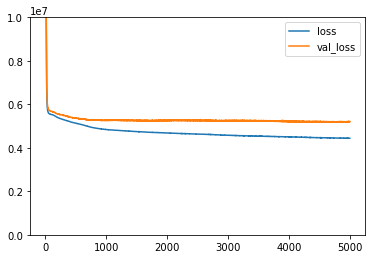

In [27]:
losses.plot()
plt.ylim(0,10000000)

## model ewaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
predictions = model.predict(X_test)

In [30]:
mean_absolute_error(y_test,predictions)

1402.4404777820018

In [31]:
np.sqrt(mean_squared_error(y_test,predictions))

2282.2475883470524

In [32]:
r2_score(y_test,predictions)

0.6945727039226541

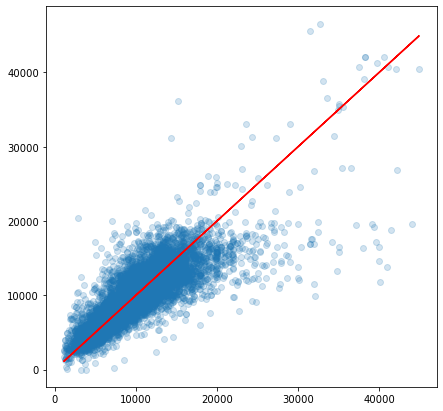

In [33]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

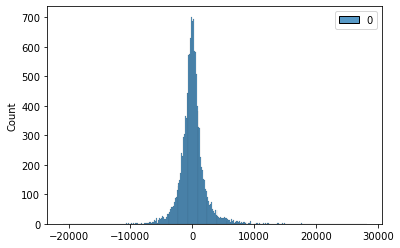

In [35]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [36]:
predictions.reshape(y_test.shape[0])[:20]

array([12347.766 , 10721.773 ,  2498.6143,  7656.0137,  6643.924 ,
        8801.218 ,  7636.8286, 13211.333 ,  7292.516 ,  8058.9956,
        6739.3574,  4649.279 , 14247.867 , 13573.602 , 11465.103 ,
       12711.45  , 12077.61  ,  6260.931 , 13188.578 , 11461.468 ],
      dtype=float32)

In [37]:
y_test[:20]

array([ 9514.5631068 , 17193.9477304 ,  1469.40956452,  7984.        ,
        6108.10810811,  8246.37681159,  7589.28571429, 11837.15795433,
        7250.        ,  6962.26415094,  7300.        ,  3652.77777778,
       18450.01678416, 14829.19397117, 14300.65198671, 13302.75229358,
       30099.57754979, 12790.69767442, 11234.67756262, 11000.        ])

In [38]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.29777537, 0.62357834, 1.70042058, 0.95891955, 1.08772204,
       1.067283  , 1.00626448, 1.11608995, 1.00586429, 1.15752511,
       0.92319965, 1.27280637, 0.77224142, 0.91532969, 0.80171887,
       0.95555039, 0.40125514, 0.48949098, 1.17391692, 1.04195162])

## saving data

In [39]:
# from datetime import datetime
# from tensorflow.keras.models import load_model
# timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
# model.save('models_ann\\' + timestamp)

In [40]:
# import joblib
# joblib.dump(scaler, 'scaler')